In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import sys
!{sys.executable} -m pip install seaborn


|Variable|	Definition|	Key|
|---|---|---|
 |survival|	Survival for life	|Survived: The target variable (0 or 1) indicating survival status. |
 |pclass|	Ticket class	|The passenger's ticket class (1st, 2nd, or 3rd), an indicator of socioeconomic status. |
 |sex|	Sex	| The gender of the passenger. |
 |Age|	Age in years|	The passenger's age at the time of the incident. |
 |sibsp|	siblings / spouses|	The number of siblings or spouses aboard. |
 |parch|	parents / children|	The number of parents or children aboard. |
 |fare|	Passenger fare|	The amount paid for the ticket. |
 |cabin|	Cabin number	|The cabin number. |
 |embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton The port where the passenger embarked. |


#### Purpose: To predict whether a passenger survived or not, serving as a binary classification problem. 
#### Data Source: Information from passengers on the ill-fated RMS Titanic, which sank after hitting an iceberg in 1912. 

In [60]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Data Claening and EDA~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [62]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [63]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [64]:
data.isnull().sum()[data.isnull().sum()>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [65]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [66]:
data.at[0,"sex"] #loc

'male'

In [67]:
data.iat[0,2] #iloc

'male'

In [68]:
data.loc[0,"sex"] #loc

'male'

In [69]:
data.iloc[0,2]

'male'

In [70]:
data['class'].cat.categories

Index(['First', 'Second', 'Third'], dtype='object')

In [72]:
data['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [73]:
data['class'].astype('category')

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [74]:
data['who'].astype('category')

0        man
1      woman
2      woman
3      woman
4        man
       ...  
886      man
887    woman
888    woman
889      man
890      man
Name: who, Length: 891, dtype: category
Categories (3, object): ['child', 'man', 'woman']

In [75]:
data.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [76]:
data.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [77]:
pd.crosstab(data.sex,data.alive)

alive,no,yes
sex,,
female,81,233
male,468,109


In [78]:
pd.crosstab(data.sex,[data.pclass,data.survived])

pclass     1       2        3    
survived   0   1   0   1    0   1
sex                              
female     3  91   6  70   72  72
male      77  45  91  17  300  47

In [79]:
data.sex.value_counts(normalize=True)*100

sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

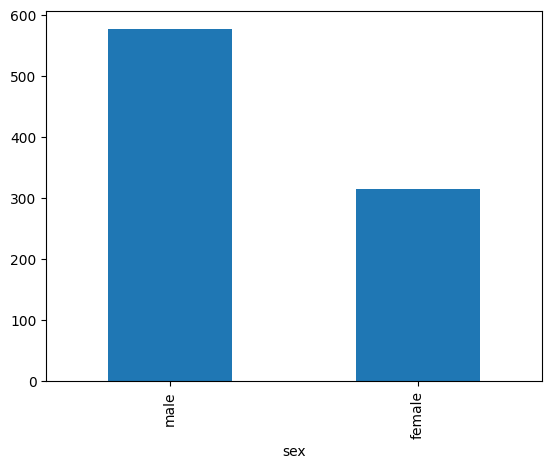

In [80]:
data.sex.value_counts().plot(kind="bar")
plt.show()

<Axes: xlabel='sex', ylabel='count'>

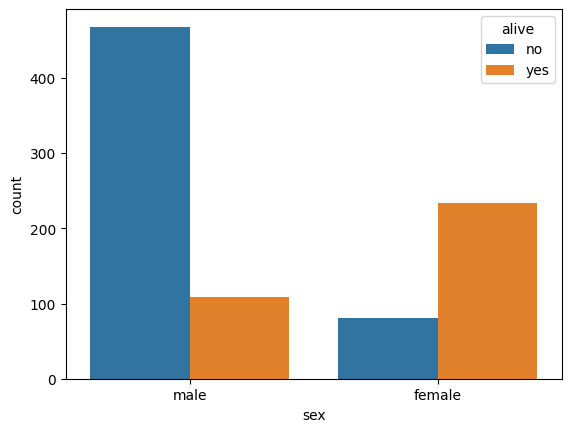

In [81]:
sns.countplot(data=data, x="sex", hue="alive")

<Axes: xlabel='sex', ylabel='count'>

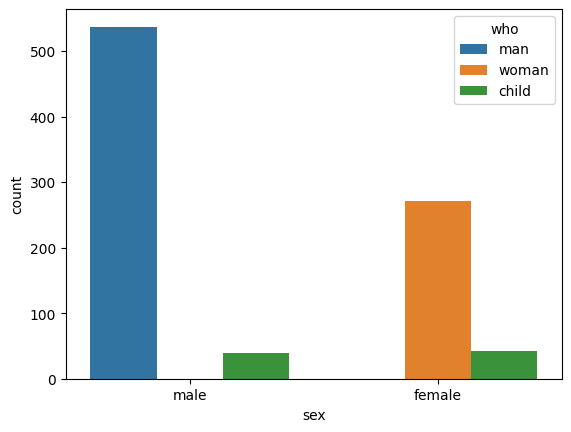

In [82]:
sns.countplot(data=data, x="sex", hue="who")

<Axes: xlabel='class', ylabel='count'>

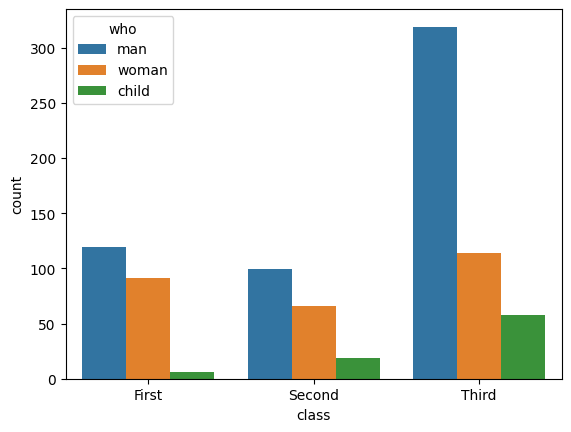

In [42]:
sns.countplot(data=data, x="class", hue="who")

In [83]:
pd.crosstab(data.who,data["class"])

class,First,Second,Third
who,,,
child,6,19,58
man,119,99,319
woman,91,66,114


In [84]:
data.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [85]:
data.who.replace({"man":0,"woman":0,"child":1}).count()

C:\Users\hp\AppData\Local\Temp\ipykernel_29500\3897547050.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.who.replace({"man":0,"woman":0,"child":1}).count()


np.int64(891)

In [86]:
pd.crosstab(data.who.replace({"man":0,"woman":0,"child":1}),data["class"])

C:\Users\hp\AppData\Local\Temp\ipykernel_29500\1969508822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd.crosstab(data.who.replace({"man":0,"woman":0,"child":1}),data["class"])


class,First,Second,Third
who,,,
0,210,165,433
1,6,19,58


In [87]:
pd.crosstab(data.who.replace({"man":0,"woman":0,"child":1}),[data["class"],data.alive])

C:\Users\hp\AppData\Local\Temp\ipykernel_29500\479506181.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd.crosstab(data.who.replace({"man":0,"woman":0,"child":1}),[data["class"],data.alive])


class First      Second     Third    
alive    no  yes     no yes    no yes
who                                  
0        79  131     97  68   339  94
1         1    5      0  19    33  25

In [88]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [89]:
data.pclass.unique()

array([3, 1, 2])

In [90]:
data.sex.unique()

array(['male', 'female'], dtype=object)

In [91]:
data.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [92]:
data["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [93]:
data.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [94]:
data.adult_male.unique()

array([ True, False])

In [95]:
data.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [96]:
data.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [97]:
data.alive.unique()

array(['no', 'yes'], dtype=object)

In [98]:
data.alone.unique()

array([False,  True])

In [99]:
data.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [100]:
data["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [101]:
data["class"].value_counts(normalize=True)*100

class
Third     55.106622
First     24.242424
Second    20.650954
Name: proportion, dtype: float64

In [102]:
pd.crosstab(data["class"],data.alive)

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


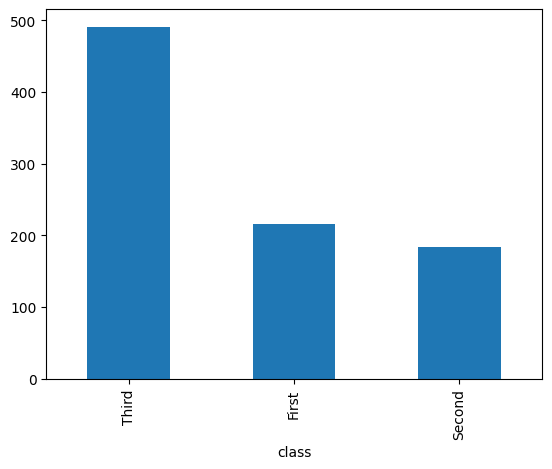

In [103]:
data["class"].value_counts().plot(kind="bar")
plt.show()

<Axes: xlabel='class', ylabel='count'>

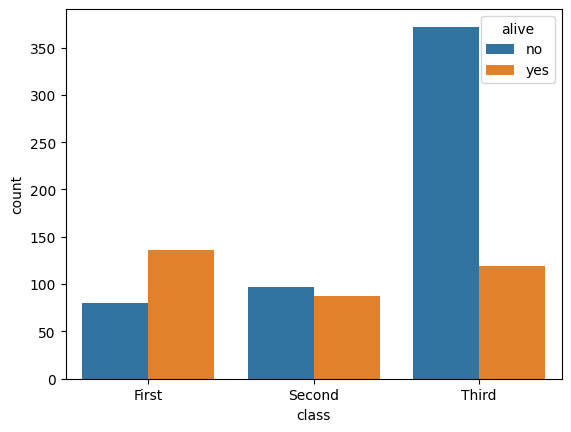

In [104]:
sns.countplot(data=data, x="class", hue="alive")

In [105]:
pd.crosstab(data["class"],data.sex)

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


<Axes: xlabel='class', ylabel='count'>

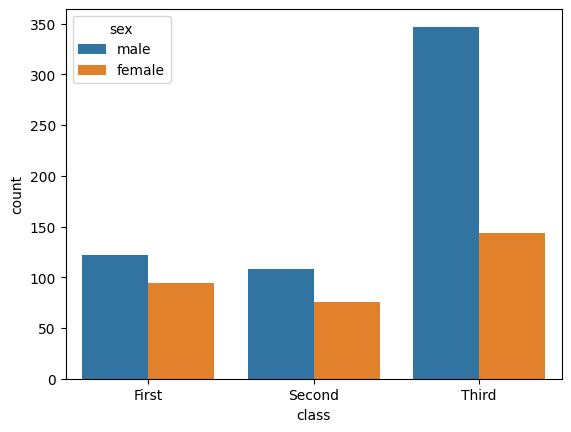

In [106]:
sns.countplot(data=data, x="class", hue="sex")

<Axes: xlabel='age', ylabel='Density'>

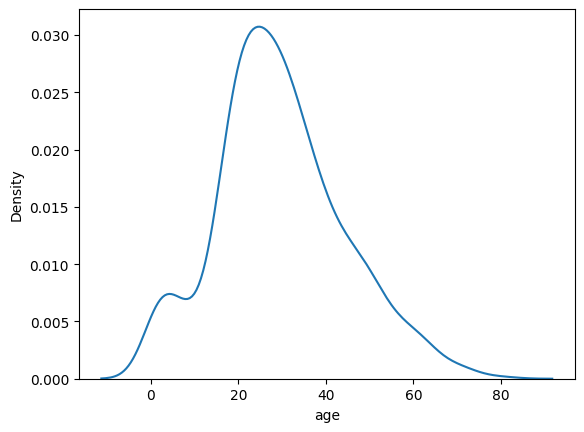

In [107]:
sns.kdeplot(data=data, x="age")

<Axes: ylabel='Frequency'>

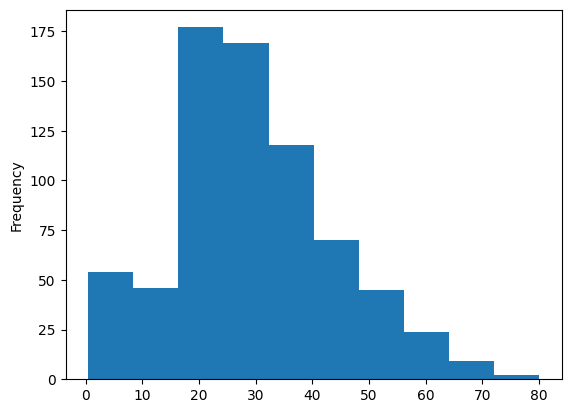

In [108]:
data.age.plot(kind="hist")

<Axes: ylabel='Frequency'>

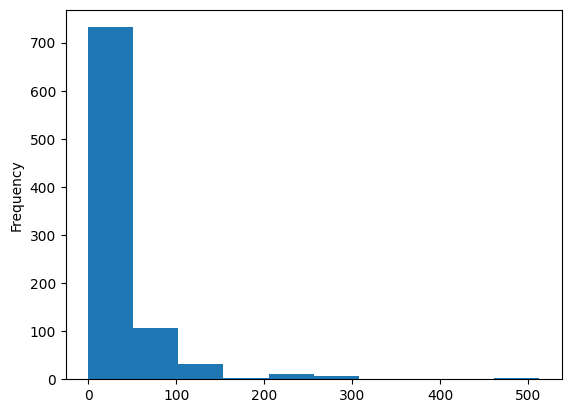

In [109]:
data.fare.plot(kind="hist")

In [110]:
data.fare.mean()

np.float64(32.204207968574636)

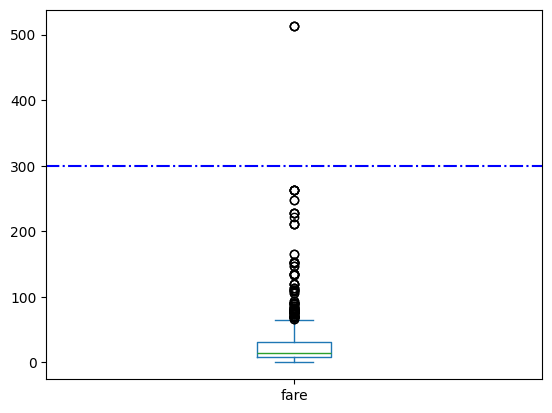

In [111]:
data.fare.plot(kind="box")
plt.axhline(color='b',y=300, linestyle='-.')

<Axes: >

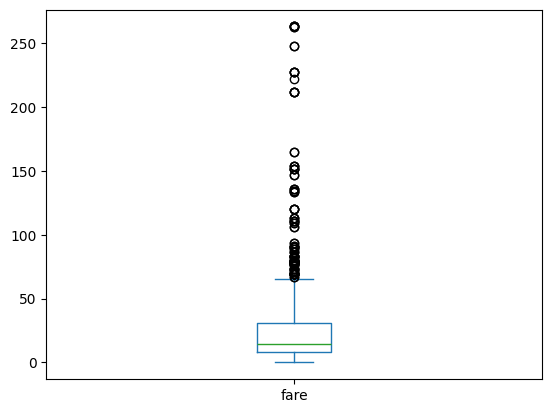

In [112]:
data.fare[data.fare<300].plot(kind="box")

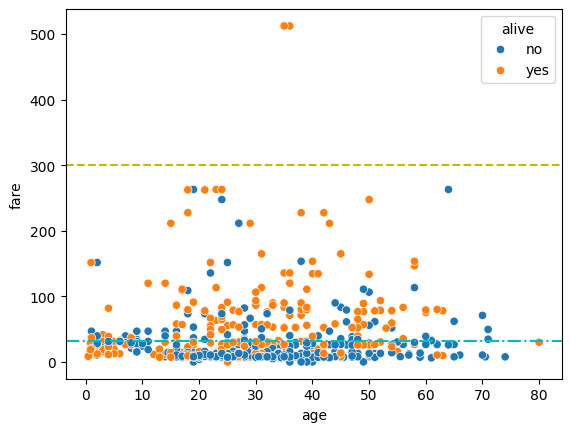

In [113]:
sns.scatterplot(data=data,x="age",y="fare",hue="alive")
plt.axhline(color='y',y=300, linestyle='--')
plt.axhline(color='c',y=data.fare.mean(),linestyle='-.')

plt.show()

1. Male are surviing less than female
2. First class are survivng more
3. High fare people are surviving more which lead to there class

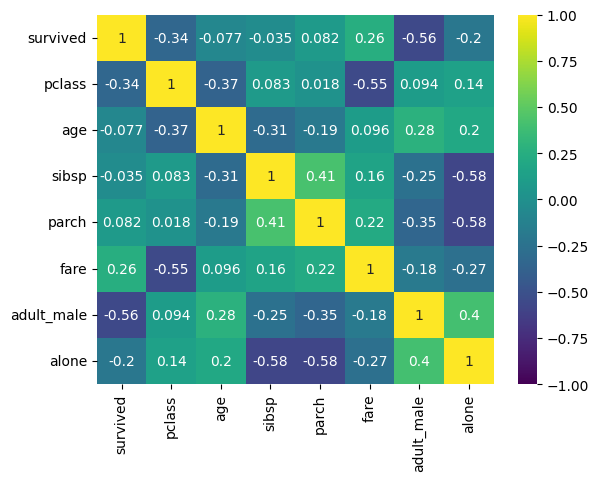

In [114]:
sns.heatmap(data.corr(numeric_only=True),annot=True,vmin=-1, cmap="viridis")
plt.show()

###After all the steps we can remove duplicates by drop_duplicate


In [115]:
data.drop_duplicates(inplace=True)

In [117]:
data.shape

(784, 15)

In [118]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [119]:
data.isnull().sum()[data.isnull().sum()>0]

age            106
embarked         2
deck           582
embark_town      2
dtype: int64

In [61]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [120]:
dropped_columns = ['embark_town', 'alive', 'deck', 'adult_male']

In [121]:
data.drop(columns=dropped_columns,inplace=True)

In [122]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True


#### ~~~~~~~~~~~~~~~~~~~Imputation/Filling missing values~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [123]:
data.age = data.age.fillna(data.age.mean())
data.embarked = data.embarked.fillna(data.embarked.mode()[0])

In [124]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

#### ~~~~~~~~~~~~~~~~~~~~~Outliers/Scaling/Encoding~~~~~~~~~~~~~~~~~~~~~~~~

In [8]:
data.fare[data.fare>300] #From above plot we found that the maximum value can be 300, so replacing with 300 all values

258    512.3292
679    512.3292
737    512.3292
Name: fare, dtype: float64

In [125]:
data.fare[data.fare>300] = 300

C:\Users\hp\AppData\Local\Temp\ipykernel_29500\2159243061.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.fare[data.fare>300] = 300
C:\Users\hp\AppData\Local\Temp\ipykernel_29500\2159243061.py:1: SettingWithCopyWarning: 
A value is 

In [126]:
data.fare[data.fare>300]

Series([], Name: fare, dtype: float64)

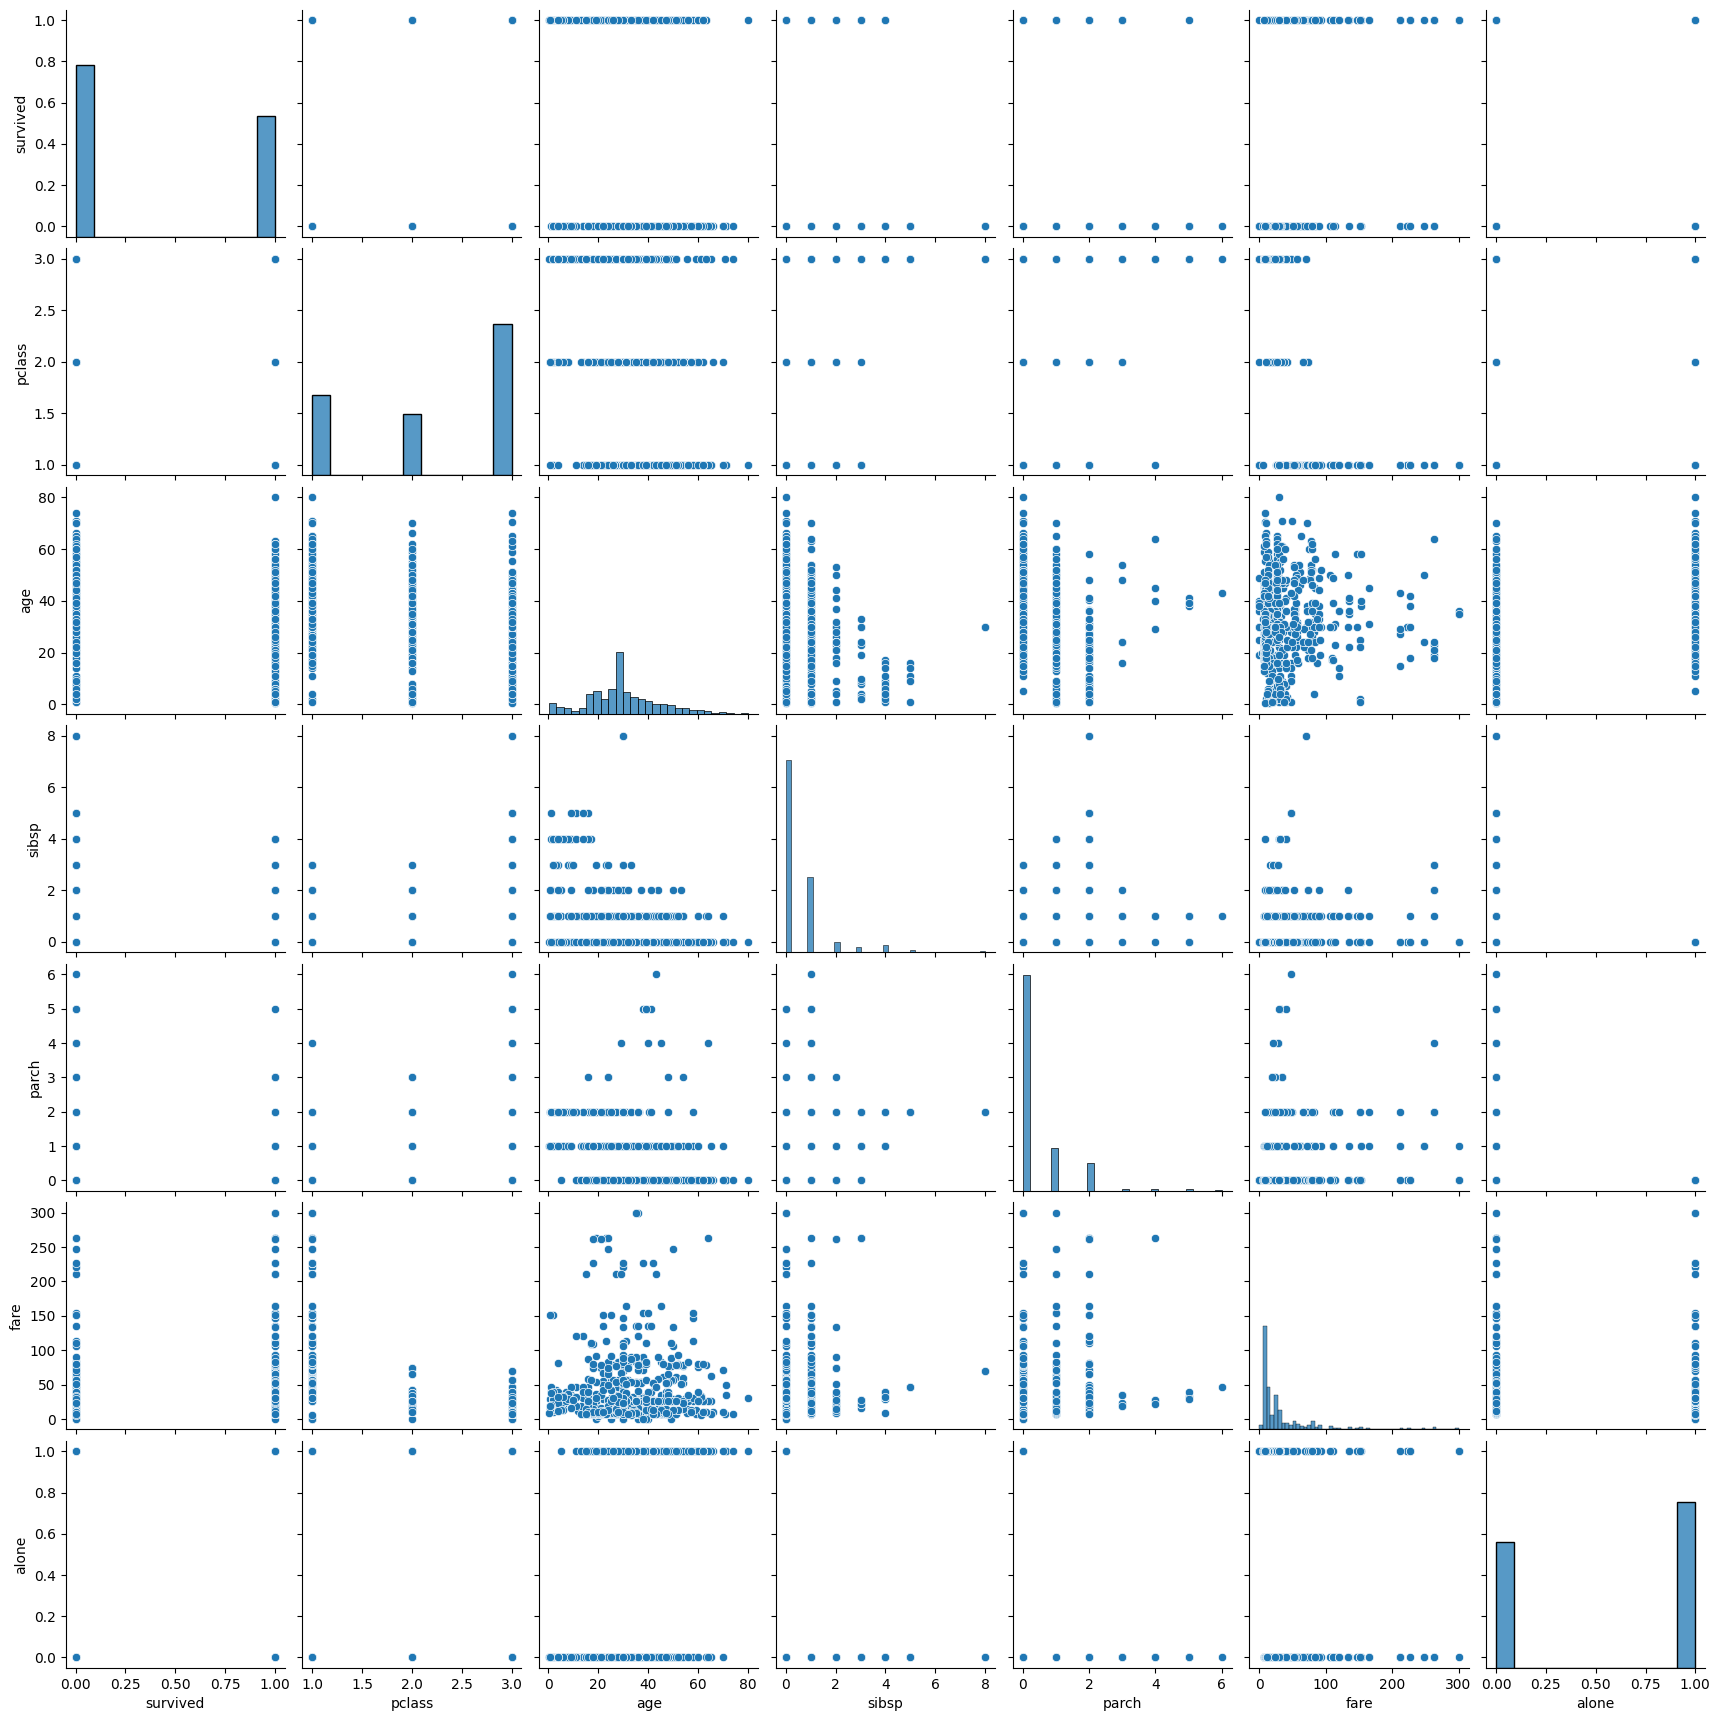

In [127]:
sns.pairplot(data)

<Axes: ylabel='fare'>

C:\Users\hp\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


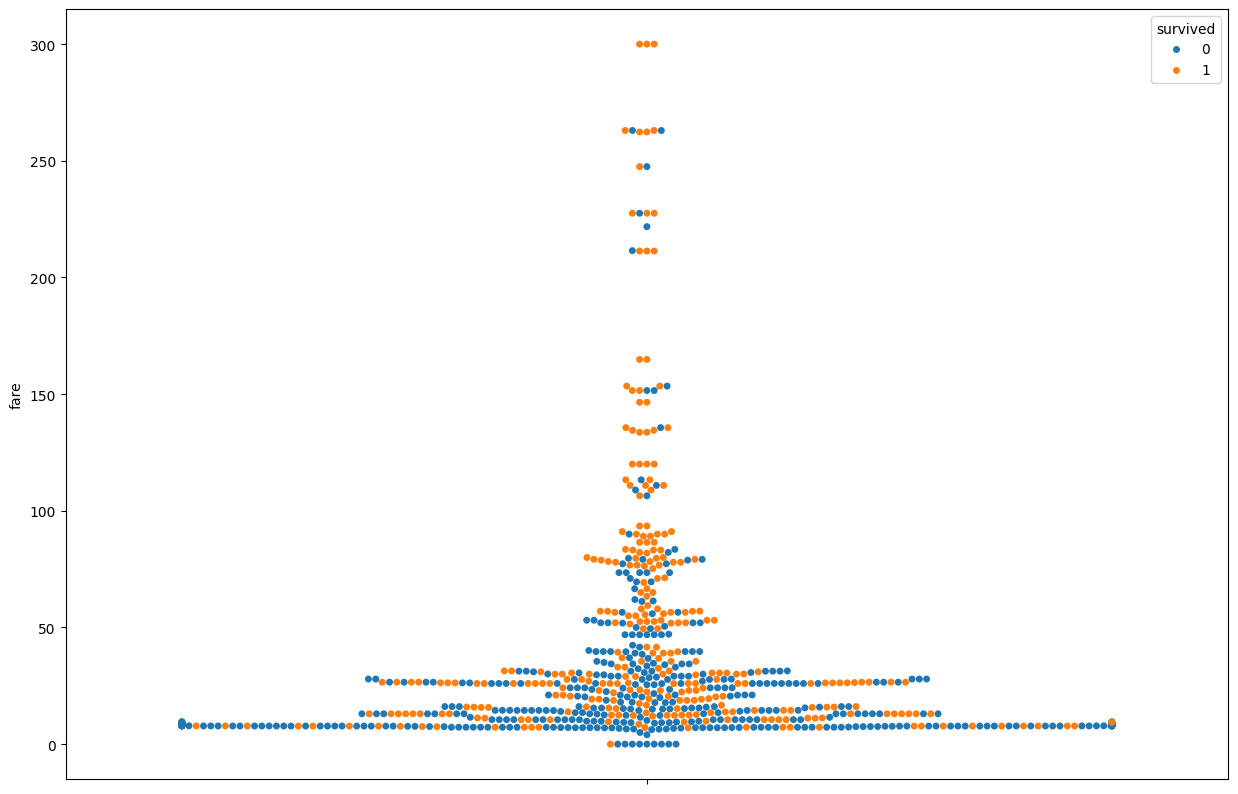

In [128]:
plt.figure(figsize=(15,10))
sns.swarmplot(data=data,y="fare",hue="survived")

<Axes: xlabel='fare'>

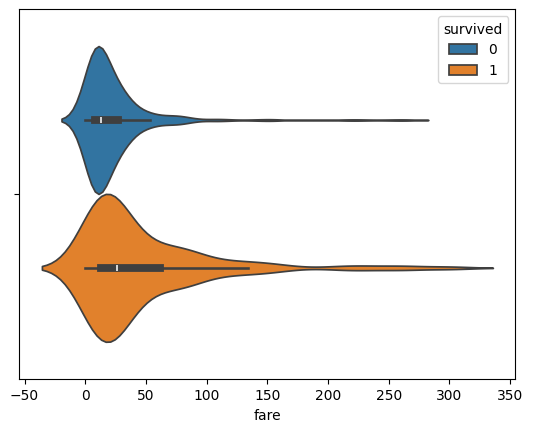

In [130]:
sns.violinplot(data=data,x="fare",hue="survived")

In [131]:
data_encoded = pd.get_dummies(data,drop_first=True).astype(float)

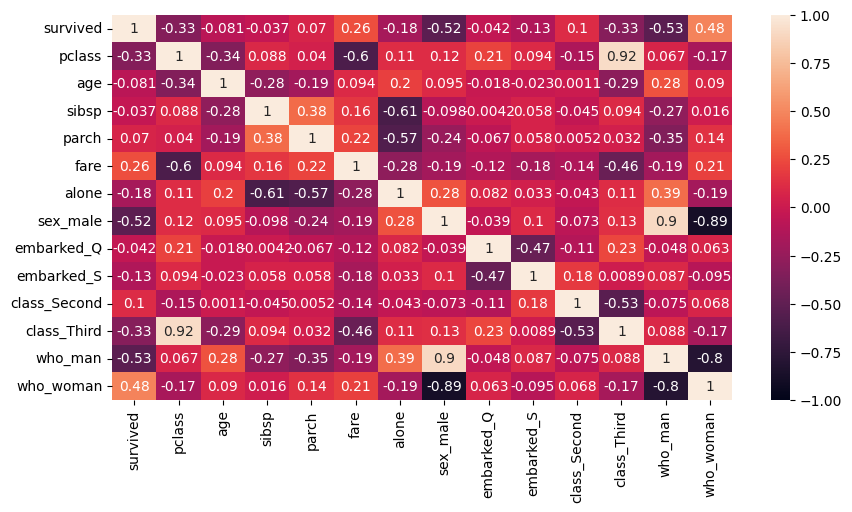

In [132]:
plt.figure(figsize=(10,5))
sns.heatmap(data_encoded.astype(float).corr(),annot=True,vmin=-1)
plt.show()

In [133]:
data_encoded.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [38]:
#data["family"]=data.sibsp+data.parch

In [39]:
#data["child"]=data.who.replace({'man':0, 'woman':0, 'child':1})

#### ~~~~~~~~~~~~~~~~~~~~~~Scaling Data~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [134]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
import sys
!{sys.executable} -m pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------------------- -------------- 5.5/8.7 MB 27.3 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 23.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ----- ---------------------------------- 5.2/38.5 MB 26.0 MB/s eta 0:00:02
   ---------- ----------------------------- 9.7/38.5 MB 22.8 MB/s eta 0:00:02
   -------------- ------------------------- 13.9/38.5 MB 20.9 MB/s eta 0:00:02
   ----------------- ---------------------- 17.0/38.5 MB 18.8 MB/s eta 0:00:02
   ----------------------- ---------------- 23.1/38.5 MB 20.0 MB/s eta 0:00:01
   ----------------------------- ---------- 28.0/38.5 MB 20.4 MB/s eta 0:00:01
   ---------------------------------- ----- 32.8/38.5 MB 20.3 MB/s eta 0:00:01
   -------------------------------------- - 36.7/38.5 MB 20.2 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 19.2 MB/s eta 0:00:0

In [135]:
mms=MinMaxScaler()

In [136]:
data_encoded[["fare","age"]] = mms.fit_transform(data_encoded[["fare","age"]])

In [137]:
data_encoded.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman
0,0.0,3.0,0.271174,1.0,0.0,0.024167,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,1.0,0.472229,1.0,0.0,0.237611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3.0,0.321438,0.0,0.0,0.026417,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.434531,1.0,0.0,0.177000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,0.434531,0.0,0.0,0.026833,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
